In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.cm import get_cmap
plt.rcParams.update({'font.size': 16, 'lines.markersize': 8})
cmap = get_cmap('tab10').colors

In [2]:
conv = lambda s: float(s.decode().replace(',','.'))

def gauss(x, a, mu, s):
    return a*np.exp(-(x-mu)**2/(2*s**2))

In [3]:
# Get all fit values. Note: np.histogram gives bins in the following way: count[i] in between bins[i] - bins[i+1]
data = np.loadtxt('measurements/1_2_16ns', delimiter='\t', converters=conv)
count_16, bins_16 = np.histogram(data, bins=100)
fit_mask_16 = (bins_16[:-1] > 0) & (bins_16[:-1] < 2)
popt, pcov = curve_fit(gauss, bins_16[:-1][fit_mask_16]+0.025, count_16[fit_mask_16], p0=[1e3, 1, 1])
heights = [(popt[0], pcov[0,0]**0.5)]
means = [(popt[1], pcov[1,1]**0.5)]
sigmas = [(popt[2], pcov[2,2]**0.5)]

data = np.loadtxt('measurements/1_2_32ns', delimiter='\t', converters=conv)
count_32, bins_32 = np.histogram(data, bins=100)
fit_mask_32 = (bins_32[:-1] > 1.7) & (bins_32[:-1] < 2.7)
popt, pcov = curve_fit(gauss, bins_32[:-1][fit_mask_32] + 0.025, count_32[fit_mask_32], p0=[1e3, 1, 1])
heights.append((popt[0], pcov[0,0]**0.5))
means.append((popt[1], pcov[1,1]**0.5))
sigmas.append((popt[2], pcov[2,2]**0.5))

data = np.loadtxt('measurements/1_2_48ns', delimiter='\t', converters=conv)
count_48, bins_48 = np.histogram(data, bins=100)
fit_mask_48 = (bins_48[:-1] > 2.5) & (bins_48[:-1] < 3.5)
popt, pcov = curve_fit(gauss, bins_48[:-1][fit_mask_48] + 0.025, count_48[fit_mask_48], p0=[1e3, 1, 1])
heights.append((popt[0], pcov[0,0]**0.5))
means.append((popt[1], pcov[1,1]**0.5))
sigmas.append((popt[2], pcov[2,2]**0.5))

data = np.loadtxt('measurements/1_2_56ns', delimiter='\t', converters=conv)
count_56, bins_56 = np.histogram(data, bins=100)
fit_mask_56 = (bins_56[:-1] > 3) & (bins_56[:-1] < 4)
popt, pcov = curve_fit(gauss, bins_56[:-1][fit_mask_56] + 0.025, count_56[fit_mask_56], p0=[1e3, 1, 1])
heights.append((popt[0], pcov[0,0]**0.5))
means.append((popt[1], pcov[1,1]**0.5))
sigmas.append((popt[2], pcov[2,2]**0.5))

heights = np.array(heights)
means = np.array(means)
sigmas = np.array(sigmas)

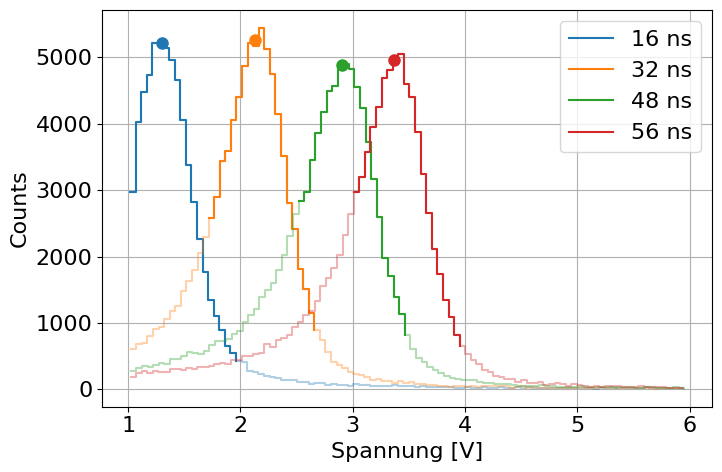

In [4]:
fig, ax = plt.subplots(figsize=(7.5,5))

ax.step(bins_16[:-1], count_16, where='post', color = cmap[0], alpha=0.35)
ax.step(bins_16[:-1][fit_mask_16], count_16[fit_mask_16], where='post', label='16 ns', color = cmap[0])
ax.step(bins_32[:-1], count_32, where='post', color = cmap[1], alpha=0.35)
ax.step(bins_32[:-1][fit_mask_32], count_32[fit_mask_32], where='post', label='32 ns', color = cmap[1])
ax.step(bins_48[:-1], count_48, where='post', color= cmap[2], alpha=0.35)
ax.step(bins_48[:-1][fit_mask_48], count_48[fit_mask_48], where='post', label='48 ns', color = cmap[2])
ax.step(bins_56[:-1], count_56, where='post', color = cmap[3], alpha=0.35)
ax.step(bins_56[:-1][fit_mask_56], count_56[fit_mask_56], where='post', label='56 ns', color = cmap[3])
ax.plot(means[0,0], heights[0,0], 'o', color=cmap[0])
ax.plot(means[1,0], heights[1,0], 'o', color=cmap[1])
ax.plot(means[2,0], heights[2,0], 'o', color=cmap[2])
ax.plot(means[3,0], heights[3,0], 'o', color=cmap[3])
ax.legend()
ax.grid()
ax.set_xlabel('Spannung [V]')
ax.set_ylabel('Counts')
fig.tight_layout()
fig.savefig('plots/1_2_voltage.pdf', bbox_inches='tight')

Die Kalibrationsgleichung lautet t = 19.57422891667206 ns/V *U + -9.411000540809445 ns
Aus der Kalibration ergeben sich Peaks für die Verzögerungen:
[16.01938627 32.20971309 47.35349765 56.417403  ]
Und Fehler:
[0.74050929 1.18236336 1.49283173 1.19753072]
Zeitauflösung aus FWHM [23.90497883 24.94546567 25.6765628  24.98118205] ns
Fehler auf FWHM [0.26963996 0.32008307 0.28257314 0.27617948]
Gewichteter Mittelwert: 24.850112193493263 +/- 0.14264053176685113 ns


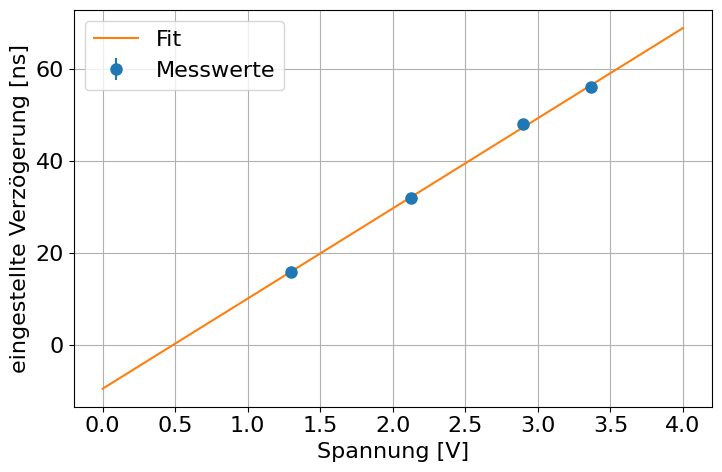

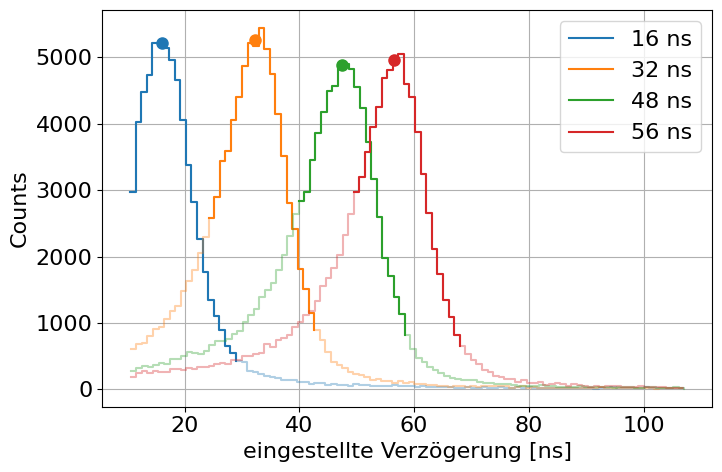

In [5]:
# Perform time-channel-calibration:
x = [means[0,0], means[1,0], means[2,0], means[3,0]]
y = [16, 32, 48, 56]
popt, pcov = curve_fit(lambda x, a, b: a*x + b, x, y, absolute_sigma=True, sigma=0.25*np.ones_like(x))

fig, ax = plt.subplots(figsize=(7.5,5))
ax.errorbar(x,y,0.25,None, 'o', label='Messwerte')
ax.plot(np.linspace(0,4,100), np.polyval(popt, np.linspace(0,4,100)), label='Fit')
ax.set_xlabel('Spannung [V]')
ax.set_ylabel('eingestellte Verzögerung [ns]')
ax.grid()
ax.legend()
fig.tight_layout()
fig.savefig('plots/1_2_calibration.pdf', bbox_inches='tight')

fig, ax = plt.subplots(figsize=(7.5,5))
ax.step(np.polyval(popt, bins_16[:-1]), count_16, where='post', color = cmap[0], alpha=0.35)
ax.step(np.polyval(popt, bins_16[:-1])[fit_mask_16], count_16[fit_mask_16], where='post', label='16 ns', color = cmap[0])
ax.step(np.polyval(popt, bins_32[:-1]), count_32, where='post', color = cmap[1], alpha=0.35)
ax.step(np.polyval(popt, bins_32[:-1])[fit_mask_32], count_32[fit_mask_32], where='post', label='32 ns', color = cmap[1])
ax.step(np.polyval(popt, bins_48[:-1]), count_48, where='post', color= cmap[2], alpha=0.35)
ax.step(np.polyval(popt, bins_48[:-1])[fit_mask_48], count_48[fit_mask_48], where='post', label='48 ns', color = cmap[2])
ax.step(np.polyval(popt, bins_56[:-1]), count_56, where='post', color = cmap[3], alpha=0.35)
ax.step(np.polyval(popt, bins_56[:-1])[fit_mask_56], count_56[fit_mask_56], where='post', label='56 ns', color = cmap[3])
ax.plot(np.polyval(popt, means[0,0]), heights[0,0], 'o', color=cmap[0])
ax.plot(np.polyval(popt, means[1,0]), heights[1,0], 'o', color=cmap[1])
ax.plot(np.polyval(popt, means[2,0]), heights[2,0], 'o', color=cmap[2])
ax.plot(np.polyval(popt, means[3,0]), heights[3,0], 'o', color=cmap[3])
ax.legend()
ax.grid()
ax.set_xlabel('eingestellte Verzögerung [ns]')
ax.set_ylabel('Counts')
fig.tight_layout()
fig.savefig('plots/1_2_time.pdf', bbox_inches='tight')

def errprop(sigma, dsigma):
    c = 2*np.sqrt(2*np.log(2))
    a = popt[0]
    da2 = pcov[0,0]
    return (c*sigma)**2 *da2 + (a*c*dsigma)**2

d_FWHM = errprop(np.abs(sigmas[:,0]), np.abs(sigmas[:,1]))
print(f'Die Kalibrationsgleichung lautet t = {popt[0]} ns/V *U + {popt[1]} ns')
print('Aus der Kalibration ergeben sich Peaks für die Verzögerungen:')
print(np.polyval(popt, means[:,0]))
print('Und Fehler:')
print(np.polyval(popt, np.sqrt(np.abs(sigmas[:,0]))))
print('Zeitauflösung aus FWHM', 2*np.sqrt(2*np.log(2))*popt[0]* np.sqrt(np.abs(sigmas[:,0])), 'ns')
print('Fehler auf FWHM', d_FWHM**0.5)
# Calcuate weighted mean and variance:
mean = np.average(2*np.sqrt(2*np.log(2))*popt[0]* np.sqrt(np.abs(sigmas[:,0])), weights=1/d_FWHM)
meanerr = (1/np.sum(1/d_FWHM))**0.5
print('Gewichteter Mittelwert:', mean,'+/-', meanerr, 'ns')

In [6]:
popt[0]*sigmas[:,0] + popt[1]

array([-14.67573675,  -3.67798499,  -3.33701629,  -3.66155642])

## 1.3

Die Breite des Koinzidenzfensters beträgt: 13.134307603086947 +/- 0.106907379150706 ns


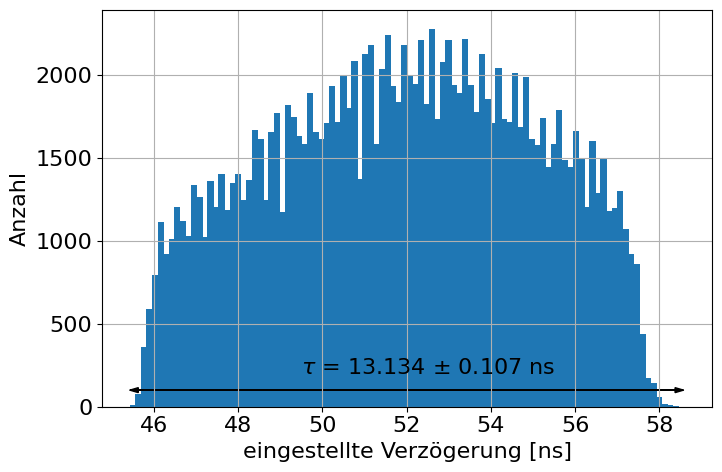

In [7]:
data = np.loadtxt('measurements/1_3_48ns_beschnittendes_Spektrum', delimiter='\t', converters=conv)
counts, bins = np.histogram(data, bins=100)

del_tau = popt[0] *(bins[-1]-bins[0])
del_tau_err = pcov[0,0]**0.5 * (bins[-1]-bins[0]) #STandardabweichung!

fig, ax = plt.subplots(figsize=(7.5,5))
ax.bar(popt[0] * bins[:-1] + popt[1], counts, align='edge', width=0.15, color=cmap[0])
ax.grid()
ax.set_xlabel('eingestellte Verzögerung [ns]')
ax.set_ylabel('Anzahl')
ax.arrow(popt[0]*bins[0]+popt[1], 100, del_tau, 0, head_width=30, head_length=0.2, fc='k', ec='k', label='FWHM', length_includes_head=True)
ax.arrow(popt[0]*bins[0]+popt[1] + del_tau, 100, -del_tau, 0, head_width=30, head_length=0.2, fc='k', ec='k', length_includes_head=True)
ax.text(49.5,200, f'$\\tau$ = {del_tau:.3f} $\pm$ {del_tau_err :.3f} ns', color='k', fontsize=16)
fig.tight_layout()
fig.savefig('plots/1_3_coincidencewindow.pdf', bbox_inches='tight')
print('Die Breite des Koinzidenzfensters beträgt:', del_tau, '+/-', del_tau_err, 'ns')

In [8]:
n_l1 = len(np.loadtxt('measurements/1_4_n1dot_1', delimiter='\t', converters=conv)) / 11.402
n_r1 = len(np.loadtxt('measurements/1_4_n2dot_1', delimiter='\t', converters=conv)) / 11.396
n_l2 = len(np.loadtxt('measurements/1_4_n1dot_2', delimiter='\t', converters=conv)) / 11.398
n_r2 = len(np.loadtxt('measurements/1_4_n2dot_2', delimiter='\t', converters=conv)) / 11.432
n_l3 = len(np.loadtxt('measurements/1_4_n1dot_3', delimiter='\t', converters=conv)) / 11.411
n_r3 = len(np.loadtxt('measurements/1_4_n2dot_3', delimiter='\t', converters=conv)) / 11.420

n_zuf = np.array([n_l1*n_r1*del_tau, n_l2*n_r2*del_tau, n_l3*n_r3*del_tau]) * 1e-9
print('Die Zufallskoinzidenzrate beträgt (Mittelwert plus minus std):', np.mean(n_zuf), '+/-', np.std(n_zuf, ddof=1), '1/s')

Die Zufallskoinzidenzrate beträgt (Mittelwert plus minus std): 0.00014528206876762248 +/- 2.390863848085098e-07 1/s


(array([1.084e+03, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 2.000e+00,
        5.000e+00, 5.000e+00, 9.000e+00, 1.000e+01, 1.200e+01, 1.400e+01,
        1.300e+01, 5.000e+00]),
 array([0.063  , 0.10088, 0.13876, 0.17664, 0.21452, 0.2524 , 0.29028,
        0.32816, 0.36604, 0.40392, 0.4418 , 0.47968, 0.51756, 0.55544,
        0.59332, 0.6312 , 0.66908, 0.70696, 0.74484, 0.78272, 0.8206 ,
        0.85848, 0.89636, 0.93424, 0.97212, 1.01   , 1.04788, 1.08576,
        1.12364, 1.16152, 1.1994 , 1.23728, 1.27516, 1.31304, 1.35092,
        1.3888 , 1.42

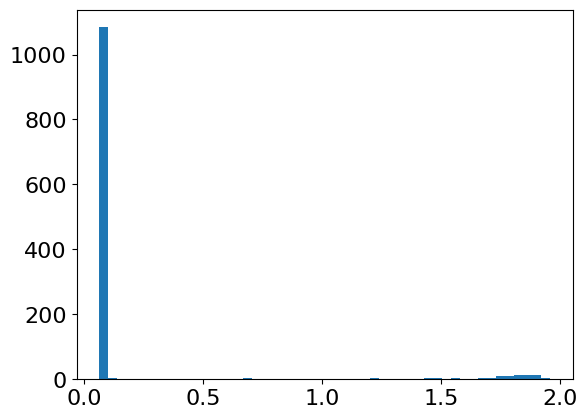

In [9]:
plt.hist(np.loadtxt('measurements/1_4_n1dot_1', delimiter='\t', converters=conv), bins=50)